In [72]:
#import all packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from matplotlib.ticker import *
from sklearn.preprocessing import StandardScaler
 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, auc


In [73]:
# split the train set and test set
raw_data = pd.read_csv('../data/data_for_train_two_position.csv', encoding='utf-8')

label = raw_data.iloc[:, [0, 1]]
input_data = raw_data.drop(columns=['position_x', 'position_y'])

label = np.array(label)
input_data = np.array(input_data)

train_x, test_x, train_y, test_y = train_test_split(input_data, label, test_size=0.2, random_state=0)

# Normalize
standardscaler = StandardScaler()
standardscaler.fit(train_x)
train_x = standardscaler.transform(train_x)
test_x = standardscaler.transform(test_x)

'''raw_data = pd.read_csv('../data/data_for_train_one_position.csv', encoding='utf-8')

label = raw_data['position']
input_data = raw_data.drop(columns=['position'])

label = np.array(label)
input_data = np.array(input_data)

train_x, test_x, train_y, test_y = train_test_split(input_data, label, test_size=0.2, random_state=0)'''

"raw_data = pd.read_csv('../data/data_for_train_one_position.csv', encoding='utf-8')\n\nlabel = raw_data['position']\ninput_data = raw_data.drop(columns=['position'])\n\nlabel = np.array(label)\ninput_data = np.array(input_data)\n\ntrain_x, test_x, train_y, test_y = train_test_split(input_data, label, test_size=0.2, random_state=0)"

In [74]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(train_x, train_y)

pred_y = knn.predict(test_x)

for i in range(0, len(pred_y)):
    print(f'The prediction result is {pred_y[i]}')
    print(f'The true result is {test_y[i]}')

print('R方: %s' % r2_score(test_y, pred_y))
R方: 0.6290565226735438
 
print('MAE: %s' % mean_absolute_error(test_y, pred_y))
MAE: 8.333333333333336
 
print('MSE: %s' % mean_squared_error(test_y, pred_y))



The prediction result is [152.11327371 109.23321994]
The true result is [198.90650405  89.87113826]
The prediction result is [194.66741192 131.45036752]
The true result is [156.42183244 131.24213703]
The prediction result is [212.63356829 108.77928281]
The true result is [217.65986232 130.39510045]
The prediction result is [181.16045688  90.62777937]
The true result is [123.89719561 111.48207355]
The prediction result is [163.17077826  74.10206816]
The true result is [192.62803624  54.2794761 ]
The prediction result is [208.00967707  93.96660839]
The true result is [160.06656 104.2981 ]
The prediction result is [170.02176221 127.34161824]
The true result is [170.86856708 127.31345975]
The prediction result is [181.53284459  75.48710483]
The true result is [128.38281084  68.57957882]
The prediction result is [ 97.38711211 150.30594406]
The true result is [219.70461538 133.57462037]
The prediction result is [180.23679209 131.06924724]
The true result is [228.89523372 129.46224889]
The pr

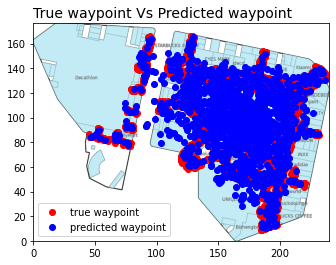

In [75]:
from matplotlib import ticker
import os
import json

test_label_x = []
test_label_y = []
pred_label_x = []
pred_label_y = []

for i in range(0, len(pred_y)):
    test_label_x.append(test_y[i][0])
    test_label_y.append(test_y[i][1])
    pred_label_x.append(pred_y[i][0])
    pred_label_y.append(pred_y[i][1])

file_path = os.path.join('../data/', 'site1', 'F1')
floor_info_path = os.path.join(file_path, 'floor_info.json')
floor_image_path = os.path.join(file_path, 'floor_image.png')

with open(floor_info_path) as floor_info_file:
    map_info = json.load(floor_info_file)['map_info']

map_height = map_info['height']
map_width = map_info['width']

fig, ax = plt.subplots()
font_dict = {'fontsize': 14,
            'fontweight': 8.2,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'left'}
plt.title('True waypoint Vs Predicted waypoint', fontdict=font_dict, loc='left')

# add floor plan
img = plt.imread(floor_image_path)
ax.imshow(img, extent=(0, map_width, 0, map_height))

plt.scatter(test_label_x, test_label_y, c='r')
plt.scatter(pred_label_x, pred_label_y, c='b')
plt.legend(['true waypoint', 'predicted waypoint'])

plt.savefig(os.path.join('../out/knn_fingerprint', 'knn_result'), format='JPG', dpi=160)

plt.show()

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights':['uniform'],
               'n_neighbors':[k for k in range(1,8)]
                },
              {'weights':['distance'],
               'n_neighbors':[k for k in range(1,8)],
               'p':[p for p in range(1,8)]
               }
              ]
kNN_reg = KNeighborsRegressor()
grid_search = GridSearchCV(kNN_reg,param_grid=param_grid)
grid_search.fit(train_x,train_y)
kNN_reg = grid_search.best_estimator_
pred_y = kNN_reg.predict(test_x)

print(np.sqrt(mean_squared_error(test_y, pred_y)))
print(r2_score(test_y,pred_y))


KeyboardInterrupt: 

In [ ]:
from matplotlib import ticker
import os
import json

test_label_x = []
test_label_y = []
pred_label_x = []
pred_label_y = []

for i in range(0, len(pred_y)):
    test_label_x.append(test_y[i][0])
    test_label_y.append(test_y[i][1])
    pred_label_x.append(pred_y[i][0])
    pred_label_y.append(pred_y[i][1])

file_path = os.path.join('../data/', 'site1', 'F1')
floor_info_path = os.path.join(file_path, 'floor_info.json')
floor_image_path = os.path.join(file_path, 'floor_image.png')

with open(floor_info_path) as floor_info_file:
    map_info = json.load(floor_info_file)['map_info']

map_height = map_info['height']
map_width = map_info['width']

fig, ax = plt.subplots()
font_dict = {'fontsize': 14,
            'fontweight': 8.2,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'left'}
plt.title('True waypoint Vs Predicted waypoint', fontdict=font_dict, loc='left')

# add floor plan
img = plt.imread(floor_image_path)
ax.imshow(img, extent=(0, map_width, 0, map_height))

plt.scatter(test_label_x, test_label_y, c='r')
plt.scatter(pred_label_x, pred_label_y, c='b')
plt.legend(['true waypoint', 'predicted waypoint'])

plt.savefig(os.path.join('../out/knn_fingerprint', 'knn_result'), format='JPG', dpi=160)

plt.show()